<a href="https://colab.research.google.com/github/nopynospy/apu_deep_learning/blob/main/LAB_7_Transfer_Learning_finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import keras
import os, shutil
import pandas as pd

In [4]:
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras import optimizers

In [ ]:
vgg_model = VGG16(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

58900480/58889256 [==============================] - 1s 0us/step


Unlike in base model, where all vgg layers were set to trainable False, only layer 4 and 5 vgg layers are set as trainable.

In [ ]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])       

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_1,False
1,<tensorflow.python.keras.layers.convolutional....,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional....,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPoo...,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional....,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional....,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPoo...,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional....,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional....,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional....,block3_conv3,False


In [ ]:
import keras
# Instantiate the sequential model and add the VGG16 model: 
model = keras.models.Sequential()
model.add(vgg_model)

In [ ]:
# Add the custom layers atop the VGG19 model: 
model.add(Flatten(name='flattened'))
model.add(Dropout(0.5, name='dropout1'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3, name='dropout2'))
model.add(Dense(1, activation='sigmoid', name='predictions'))

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flattened (Flatten)         (None, 25088)             0         
                                                                 
 dropout1 (Dropout)          (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout2 (Dropout)          (None, 512)               0         
                                                                 
 predictions (Dense)         (None, 1)                 513       
                                                                 
Total params: 27,560,769
Trainable params: 27,560,769
No

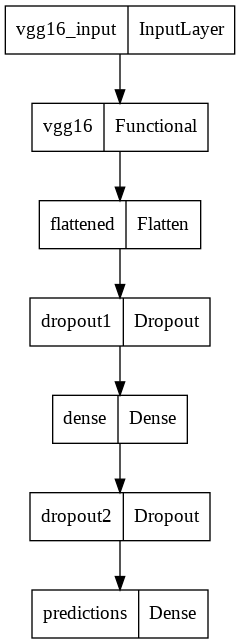

In [ ]:
plot_model(model)

In [ ]:
# mount drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Provide path to the dataset
base_dir = '/content/drive/MyDrive/DataGenerator/cats_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# Preparing the data
# Batch size depends on the datset size. 
# In this example there are 2000 image in training set and 1000 in test set.
# Both are divisible by 20. Hence batch size is chosen as 20

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory (train_dir, )
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 224x224
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


In [ ]:
# steps_per_epoch is based on the number of batches available in the training dataset
# validation_steps is based on the number of batches in the validation dataset

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 480s 4s/step - loss: 0.7423 - accuracy: 0.5375 - val_loss: 0.6289 - val_accuracy: 0.6740
Epoch 2/30
100/100 [==============================] - 92s 916ms/step - loss: 0.6521 - accuracy: 0.6340 - val_loss: 0.5797 - val_accuracy: 0.7170
Epoch 3/30
100/100 [==============================] - 92s 917ms/step - loss: 0.4658 - accuracy: 0.7810 - val_loss: 0.3663 - val_accuracy: 0.8410
Epoch 4/30
100/100 [==============================] - 92s 917ms/step - loss: 0.3533 - accuracy: 0.8535 - val_loss: 0.3930 - val_accuracy: 0.8500
Epoch 5/30
100/100 [==============================] - 92s 916ms/step - loss: 0.2576 - accuracy: 0.8980 - val_loss: 0.3176 - val_accuracy: 0.8600
Epoch 6/30
100/100 [==============================] - 92s 916ms/step - loss: 0.2073 - accuracy: 0.9305 - val_loss: 0.2516 - val_accuracy: 0.9020
Epoch 7/30
100/100 [==============================] - 92s 917ms/step - loss: 0.1596 - accuracy: 0.9420 - val_loss: 0.6598 - val_accu

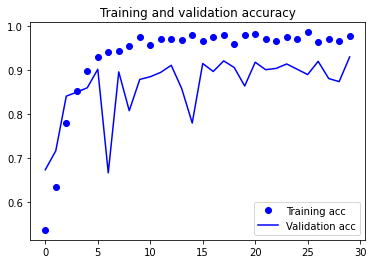

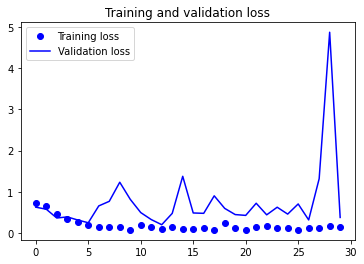

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

At epoch 30, these are the results: loss: 0.1396 - accuracy: 0.9785 - val_loss: 0.3802 - val_accuracy: 0.9300. Compared to when all VGG layers were frozen and at the same model.fit, the maximum validation accuracy achieved was not more than 0.91. Thus, only training layers 4 and 5 is better than freezing all layers.

In [ ]:
model.save('lab_7_finetune_tl.h5')

from google.colab import files
files.download('lab_7_finetune_tl.h5')
# model.save('/content/drive/My Drive/Colab Notebooks/Teaching/finetune_transfer_learning_VGG16_cats.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing the performance of training 1 vgg layer

Since animal images, including cats and dogs, are very frequently used for computer vision in general, VGG might also have been trained on similar images.

In [ ]:
vgg_model2 = VGG16(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

In [ ]:
vgg_model2.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model2.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_3,True
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,True
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,True
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,True
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,True
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,True
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,True
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,True
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,True
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,True


In [ ]:
import keras
# Instantiate the sequential model and add the VGG16 model: 
model2 = keras.models.Sequential()
model2.add(vgg_model2)

In [ ]:
# Add the custom layers atop the VGG19 model: 
model2.add(Flatten(name='flattened'))
model2.add(Dropout(0.5, name='dropout1'))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.3, name='dropout2'))
model2.add(Dense(1, activation='sigmoid', name='predictions'))

In [ ]:
from tensorflow.keras import optimizers
model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flattened (Flatten)         (None, 25088)             0         
                                                                 
 dropout1 (Dropout)          (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 512)               12845568  
                                                                 
 dropout2 (Dropout)          (None, 512)               0         
                                                                 
 predictions (Dense)         (None, 1)                 513       
                                                                 
Total params: 27,560,769
Trainable params: 27,560,769


In [ ]:
history = model2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 94s 918ms/step - loss: 0.7267 - accuracy: 0.5050 - val_loss: 0.7064 - val_accuracy: 0.4980
Epoch 2/30
100/100 [==============================] - 91s 915ms/step - loss: 0.7136 - accuracy: 0.5390 - val_loss: 0.5849 - val_accuracy: 0.6740
Epoch 3/30
100/100 [==============================] - 92s 915ms/step - loss: 0.6123 - accuracy: 0.6755 - val_loss: 0.4687 - val_accuracy: 0.7780
Epoch 4/30
100/100 [==============================] - 91s 915ms/step - loss: 0.4475 - accuracy: 0.7930 - val_loss: 0.3610 - val_accuracy: 0.8430
Epoch 5/30
100/100 [==============================] - 92s 915ms/step - loss: 0.3400 - accuracy: 0.8635 - val_loss: 0.2422 - val_accuracy: 0.8970
Epoch 6/30
100/100 [==============================] - 92s 915ms/step - loss: 0.2448 - accuracy: 0.9125 - val_loss: 0.2757 - val_accuracy: 0.8760
Epoch 7/30
100/100 [==============================] - 92s 915ms/step - loss: 0.1916 - accuracy: 0.9240 - val_loss: 0.3963 - val_ac

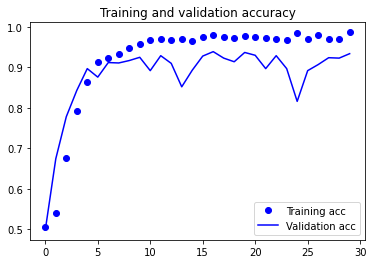

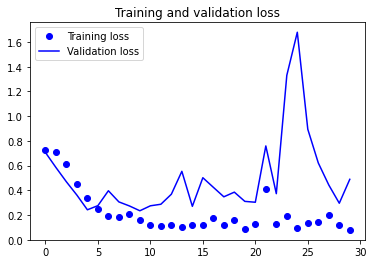

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('lab_7_finetune_tl_2.h5')

from google.colab import files
files.download('lab_7_finetune_tl_2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

At epoch 20, the result was loss: 0.0876 - accuracy: 0.9770 - val_loss: 0.3104 - val_accuracy: 0.9370. This is better than the loss: 0.1396 - accuracy: 0.9785 - val_loss: 0.3802 - val_accuracy: 0.9300 in the previous model, where VGG layers 4 and 5 were trained. Thus, when trained on only layer 5, the result is better than no layer trained and layer 4 and 5 trained.

# Resnet50

Load the pre-trained Resnet50 model

In [6]:
resnet50 = ResNet50(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

94781440/94765736 [==============================] - 1s 0us/step


Freeze all the layers in the base VGGNet16 model

In [7]:
for layer in resnet50.layers:
    layer.trainable = False

Add custom classification layers

In [8]:
import keras
from tensorflow.keras import optimizers
# Instantiate the sequential model and add the VGG16 model: 
model3 = keras.models.Sequential()
model3.add(resnet50)
# Add the custom layers atop the VGG19 model: 
model3.add(Flatten(name='flattened'))
model3.add(Dropout(0.5, name='dropout1'))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.3, name='dropout2'))
model3.add(Dense(1, activation='sigmoid', name='predictions'))

model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [9]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flattened (Flatten)         (None, 100352)            0         
                                                                 
 dropout1 (Dropout)          (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 512)               51380736  
                                                                 
 dropout2 (Dropout)          (None, 512)               0         
                                                                 
 predictions (Dense)         (None, 1)                 513       
                                                                 
Total params: 74,968,961
Trainable params: 51,381,249
No

Despite the same settings were copied from vgg, resnet has almost twice as many params

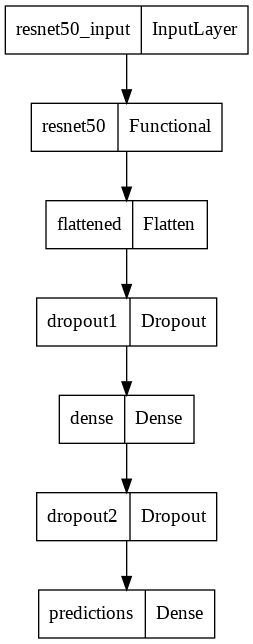

In [10]:
plot_model(model3)

Same diagram as that in vgg base, except the first 2 steps

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

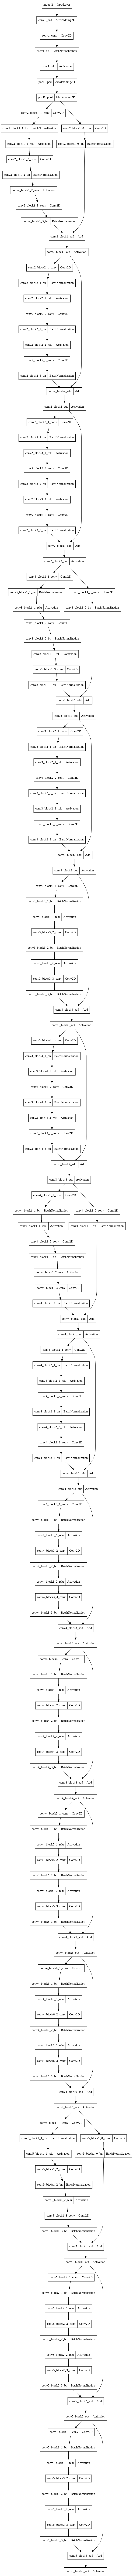

In [11]:
# This code is to see the model architecture inside Resnet50
base_model = ResNet50(weights='imagenet', include_top = False)
base_model.summary()
plot_model(base_model)

ResNet50 is a lot more complicated in terms of steps, compared to VGG16

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Provide path to the dataset
base_dir = '/content/drive/MyDrive/DataGenerator/cats_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [14]:
test_dir

'/content/drive/MyDrive/DataGenerator/cats_dogs_small/test'

In [15]:
# Directories for our training,
# validation and test splits

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [16]:
# Verify path
train_cats_dir

'/content/drive/MyDrive/DataGenerator/cats_dogs_small/train/cats'

In [17]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [18]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory (train_dir, )
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 224x224
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20,)


In [21]:
# steps_per_epoch is based on the number of batches available in the training dataset
# validation_steps is based on the number of batches in the validation dataset

history3 = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 677s 6s/step - loss: 1.1815 - accuracy: 0.5040 - val_loss: 0.6597 - val_accuracy: 0.5780
Epoch 2/30
100/100 [==============================] - 29s 289ms/step - loss: 0.7330 - accuracy: 0.5505 - val_loss: 0.6566 - val_accuracy: 0.5860
Epoch 3/30
100/100 [==============================] - 29s 288ms/step - loss: 0.6962 - accuracy: 0.5710 - val_loss: 0.6452 - val_accuracy: 0.6360
Epoch 4/30
100/100 [==============================] - 29s 287ms/step - loss: 0.6702 - accuracy: 0.5925 - val_loss: 0.6344 - val_accuracy: 0.6490
Epoch 5/30
100/100 [==============================] - 29s 288ms/step - loss: 0.6740 - accuracy: 0.5910 - val_loss: 0.7246 - val_accuracy: 0.5500
Epoch 6/30
100/100 [==============================] - 29s 288ms/step - loss: 0.6779 - accuracy: 0.6125 - val_loss: 0.6276 - val_accuracy: 0.6430
Epoch 7/30
100/100 [==============================] - 29s 288ms/step - loss: 0.6534 - accuracy: 0.6155 - val_loss: 0.6707 - val_accu

The loss, accuracy, validation loss and validation accuracy on most epochs tend to be in the range of 55 and 69. For example, at epoch 30, loss: 0.6174 - accuracy: 0.6590 - val_loss: 0.5967 - val_accuracy: 0.6840

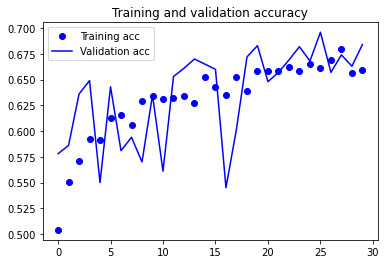

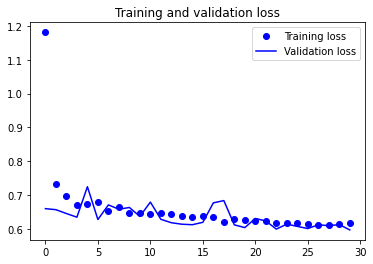

In [23]:

import matplotlib.pyplot as plt

accuracy = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Overall, the loss is higher and accuracy is lower than VGG16

In [24]:
resnet50.trainable = True

set_trainable = False
for layer in resnet50.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in resnet50.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.ZeroPadding2D obje...,conv1_pad,False
2,<keras.layers.convolutional.Conv2D object at 0...,conv1_conv,False
3,<keras.layers.normalization.batch_normalizatio...,conv1_bn,False
4,<keras.layers.core.activation.Activation objec...,conv1_relu,False
...,...,...,...
170,<keras.layers.core.activation.Activation objec...,conv5_block3_2_relu,False
171,<keras.layers.convolutional.Conv2D object at 0...,conv5_block3_3_conv,False
172,<keras.layers.normalization.batch_normalizatio...,conv5_block3_3_bn,False
173,<keras.layers.merge.Add object at 0x7fb2a0066210>,conv5_block3_add,False


In [26]:
import keras
# Instantiate the sequential model and add the VGG16 model: 
model4 = keras.models.Sequential()
model4.add(resnet50)

In [27]:
# Add the custom layers atop the VGG19 model: 
model4.add(Flatten(name='flattened'))
model4.add(Dropout(0.5, name='dropout1'))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.3, name='dropout2'))
model4.add(Dense(1, activation='sigmoid', name='predictions'))


In [28]:
from tensorflow.keras import optimizers
model4.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [29]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flattened (Flatten)         (None, 100352)            0         
                                                                 
 dropout1 (Dropout)          (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 512)               51380736  
                                                                 
 dropout2 (Dropout)          (None, 512)               0         
                                                                 
 predictions (Dense)         (None, 1)                 513       
                                                                 
Total params: 74,968,961
Trainable params: 51,381,249


In [30]:
history4 = model4.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 34s 302ms/step - loss: 1.1390 - accuracy: 0.5375 - val_loss: 0.7082 - val_accuracy: 0.5060
Epoch 2/30
100/100 [==============================] - 29s 288ms/step - loss: 0.7267 - accuracy: 0.5670 - val_loss: 0.7452 - val_accuracy: 0.5060
Epoch 3/30
100/100 [==============================] - 29s 287ms/step - loss: 0.6926 - accuracy: 0.5725 - val_loss: 0.6373 - val_accuracy: 0.6330
Epoch 4/30
100/100 [==============================] - 29s 288ms/step - loss: 0.6742 - accuracy: 0.6010 - val_loss: 0.6240 - val_accuracy: 0.6490
Epoch 5/30
100/100 [==============================] - 29s 287ms/step - loss: 0.6664 - accuracy: 0.6000 - val_loss: 0.6440 - val_accuracy: 0.6190
Epoch 6/30
100/100 [==============================] - 29s 288ms/step - loss: 0.6640 - accuracy: 0.6025 - val_loss: 0.6259 - val_accuracy: 0.6570
Epoch 7/30
100/100 [==============================] - 29s 287ms/step - loss: 0.6709 - accuracy: 0.5960 - val_loss: 0.6728 - val_ac

The results are very similar to when all layers were frozen. However, occasionally, validation accuracy goes beyong 0.7 in this case, such as at epoch 27 and 28

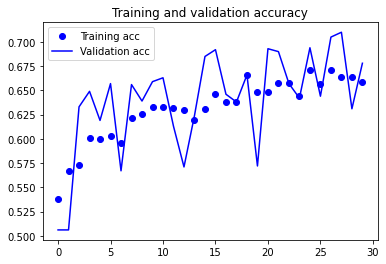

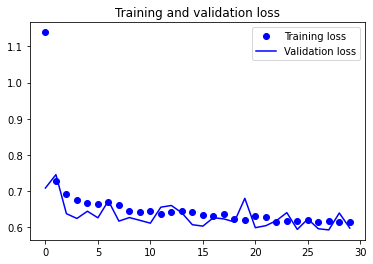

In [31]:
import matplotlib.pyplot as plt

accuracy = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# ResNet50 v2

In [33]:
from keras.applications.resnet_v2 import ResNet50V2

resnet50v2 = ResNet50V2(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)


94683136/94668760 [==============================] - 1s 0us/step


In [34]:
for layer in resnet50v2.layers:
    layer.trainable = False

In [36]:
import keras
from tensorflow.keras import optimizers
# Instantiate the sequential model and add the VGG16 model: 
model5 = keras.models.Sequential()
model5.add(resnet50v2)
# Add the custom layers atop the VGG19 model: 
model5.add(Flatten(name='flattened'))
model5.add(Dropout(0.5, name='dropout1'))
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.3, name='dropout2'))
model5.add(Dense(1, activation='sigmoid', name='predictions'))

In [37]:
model5.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [38]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flattened (Flatten)         (None, 100352)            0         
                                                                 
 dropout1 (Dropout)          (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 512)               51380736  
                                                                 
 dropout2 (Dropout)          (None, 512)               0         
                                                                 
 predictions (Dense)         (None, 1)                 513       
                                                                 
Total params: 74,946,049
Trainable params: 51,381,249


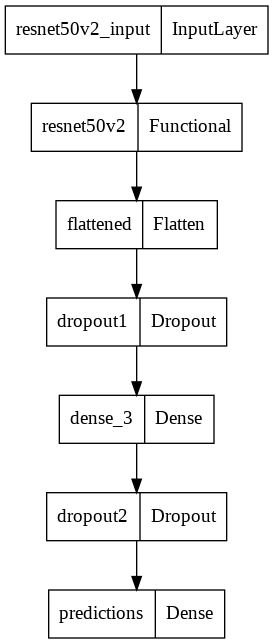

In [39]:
plot_model(model5)

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                      

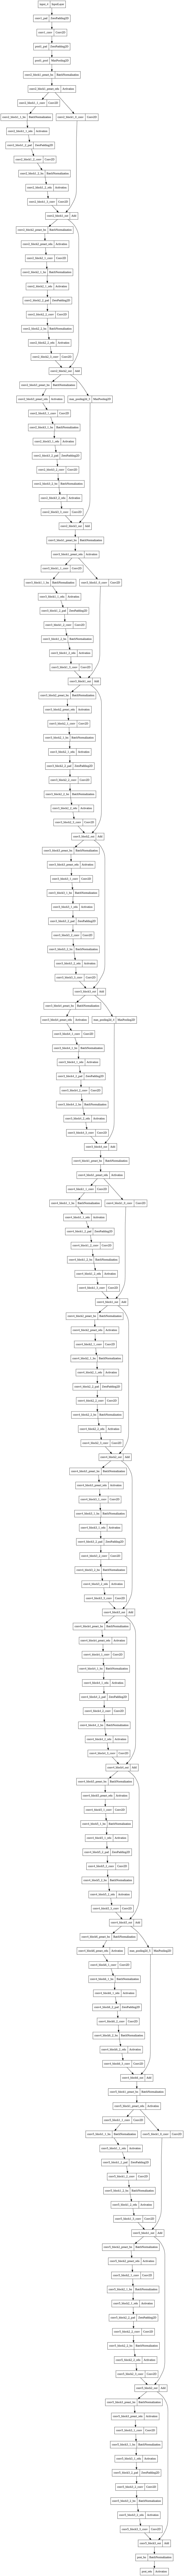

In [42]:
# This code is to see the model architecture inside resnet50v2

base_model = ResNet50V2(weights='imagenet', include_top = False)
base_model.summary()
plot_model(base_model)

In [43]:
history5 = model5.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 31s 265ms/step - loss: 0.4319 - accuracy: 0.9500 - val_loss: 0.1373 - val_accuracy: 0.9780
Epoch 2/30
100/100 [==============================] - 25s 253ms/step - loss: 0.0284 - accuracy: 0.9940 - val_loss: 0.1416 - val_accuracy: 0.9770
Epoch 3/30
100/100 [==============================] - 25s 252ms/step - loss: 0.0070 - accuracy: 0.9970 - val_loss: 0.1855 - val_accuracy: 0.9780
Epoch 4/30
100/100 [==============================] - 25s 252ms/step - loss: 7.7605e-04 - accuracy: 0.9995 - val_loss: 0.1891 - val_accuracy: 0.9800
Epoch 5/30
100/100 [==============================] - 25s 252ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.2475 - val_accuracy: 0.9810
Epoch 6/30
100/100 [==============================] - 25s 253ms/step - loss: 3.8120e-05 - accuracy: 1.0000 - val_loss: 0.2386 - val_accuracy: 0.9830
Epoch 7/30
100/100 [==============================] - 25s 252ms/step - loss: 2.9177e-04 - accuracy: 1.0000 - val_loss: 0.2

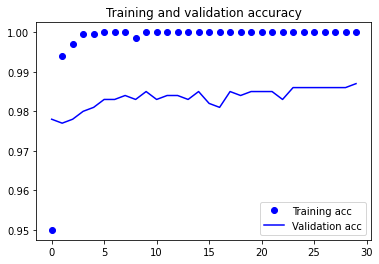

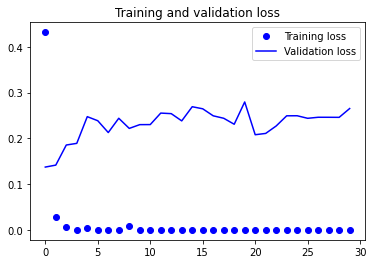

In [44]:
import matplotlib.pyplot as plt

accuracy = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Looking at the network architectures of ResNet50 and ResNet50v2, in v2, the convoltional layers are lengthier. In terms of performance, ResNet50v2 has much higher accuracy and lower loss than ResNet50. Although accuracy consistently reach 1, which is very rare, looking at the performance of only training layer 5 in vgg16, the accuracy was also around 0.98 on some of the epochs. On the other hand, the loss in this case is a lot lower than those in vgg16 layer 5 trained only.